Programming Exercise 6: Support Vector Machines on Plots
============

In this exercise, you will be using support vector machines (SVMs) to build a spam classifier. Before starting on the programming exercise, we strongly recommend watching the video lectures and completing the review questions for the associated topics. The files included in this Exercise are: 

- ex6data1.mat - Example Dataset 1
- ex6data2.mat - Example Dataset 2
- ex6data3.mat - Example Dataset 3
- svmTrain.m - SVM training function
- svmPredict.m - SVM prediction function plotData.m 
- Plot 2D data visualizeBoundaryLinear.m 
- Plot linear boundary visualizeBoundary.m 
- Plot non-linear boundary linearKernel.m 
- Linear kernel for SVM

You only have to implement these two functions:

- gaussianKernel.m - Gaussian kernel for SVM 
- dataset3Params.m - Parameters to use for Dataset 3

The contained files are found in File ==> Open or in the readonly section of Assignment6a in the home page. We highly recommend that you take a look at them as you make progress in this exercise. 

### NOTE:

You will find cells which contain the comment % GRADED FUNCTION: functionName. Do not edit that comment. Those cells will be used to grade your assignment. Each block of code with that comment should only have the function. 

Instructions will be provided as needed in the exercise. 


#### After submitting your assignment, you can [check your grades here](https://www.coursera.org/learn/machine-learning/programming/NigZS/svm-on-plots). 

Support Vector Machines
=======================

In the first half of this exercise, you will be using support vector
machines (SVMs) with various example 2D datasets. Experimenting with
these datasets will help you gain an intuition of how SVMs work and how
to use a Gaussian kernel with SVMs. In the next half of the exercise,
you will be using support vector machines to build a spam classifier.

Example Dataset 1
-----------------

We will begin with a 2D example dataset which can be separated by a
linear boundary. We will plot the training data for you
(Figure 1). In this dataset, the positions of the
positive examples (indicated with $+$) and the negative examples
(indicated with $o$) suggest a natural separation indicated by the gap.
However, notice that there is an outlier positive example $+$ on the far
left at about $(0.1,4.1)$. In this exercise you will see
how this outlier affects the SVM decision boundary.

<img src="../../readonly/Assignment6a/figure 1.png" width="450" height="450">



You will also try using different values of the
$C$ parameter with SVMs. Informally, the $C$ parameter is a positive
value that controls the penalty for misclassified training examples. A
large $C$ parameter tells the SVM to try to classify all the examples
correctly. $C$ plays a role similar to $\frac{1}{\lambda}$, where
$\lambda$ is the regularization parameter that we were using previously
for logistic regression.

<table><tr><td><img src="../../readonly/Assignment6a/figure 2.png" width="450" height="450"></td><td><img src="../../readonly/Assignment6a/figure 3.png" width="450" height="450"></td></tr></table>

Then, you will run the SVM training (with $C=1$)
using SVM software that we have included with the starter code in **svmTrain**. 

When $C=1$, you should find that the SVM puts the
decision boundary in the gap between the two datasets and
*misclassifies* the data point on the far left (Figure 2).


**Implementation Note:** Most SVM software packages (including
**svmTrain** automatically add the extra feature $x_0=1$ for you
and automatically take care of learning the intercept term $\theta_0$.
So when passing your training data to the SVM software, there is no need
to add this extra feature $x_0=1$ yourself. In particular, in
Octave/MATLAB your code should be working with training examples
$x\in \Re^n$ (rather than $x \in \Re^{n+1})$; for example, in the first
example dataset $x \in \Re^2$.

Your task is to try different values of $C$ on this dataset. Specifically,
you should change the value of $C$ in the script to $C=100$ and run the SVM training 
again. When $C=100$, you should find that the SVM now classifies every single
example correctly, but has a decision boundary that does not appear to be a 
natural fit for the data (Figure 3). 

You should experiment below with different values of C.


Training ......................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
.......................................

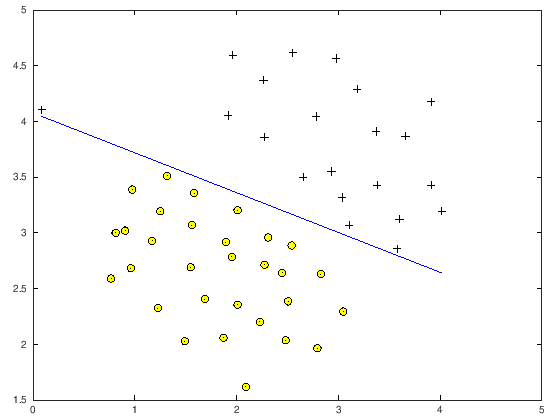

In [14]:
warning('off'); addpath('../../readonly/Assignment6a/');
load('ex6data1.mat');                       % Loading the Data ... provides you with X and y in your environment
plotData(X, y);                             % Plot training data

C = 100;
model = svmTrain(X, y, C, @linearKernel, 1e-3, 20);         % Training the linear SVM 
visualizeBoundaryLinear(X, y, model);

SVM with Gaussian Kernels
-------------------------

Now we will use SVMs to do non-linear
classification. In particular, you will be using SVMs with Gaussian
kernels on datasets that are not linearly separable.

### Gaussian Kernel

To find non-linear decision boundaries with the SVM, we need to first
implement a Gaussian kernel. You can think of the Gaussian kernel as a
similarity function that measures the “distance” between a pair of
examples, ($x^{(i)},x^{(j)}$). The Gaussian kernel is also parameterized
by a bandwidth parameter, $\sigma$, which determines how fast the
similarity metric decreases (to 0) as the examples are further apart.

You should now complete the code in the **gaussianKernel** function to compute
the Gaussian kernel between two examples, ($x^{(i)},x^{(j)}$).

Once you’ve completed the function **gaussianKernel**, run the cell under it to test your kernel function on two provided examples. 

**Implementtion:**

**sim = gaussianKernel(x1, x2)** returns a gaussian kernel between $x^{(1)}$ and $x^{(2)}$
and returns the value in sim. Make sure that $x^{(1)}$ and $x^{(2)}$ are column vectors. You should fill in this function to return the similarity between $x^{(1)}$ and $x^{(2)}$ computed using a Gaussian kernel with bandwidth sigma. 


In [15]:
% GRADED FUNCTION: gaussianKernel
function sim = gaussianKernel(x1, x2, sigma)
x1 = x1(:); x2 = x2(:);
sim = 0;                         % Return the following variable correctly.

% ============ YOUR CODE HERE ============
dif = x1 - x2;
power = (dif' *dif)/(2*sigma^2);
sim = exp(-power);
% ========================================
    
end

In [16]:
x1 = [1 2 1]; x2 = [0 4 -1]; sigma = 2;
sim = gaussianKernel(x1, x2, sigma)

sim =  0.32465


**Expected Output**:

0.32465

### Example Dataset 2

<img src="../../readonly/Assignment6a/figure 4.png" width="450" height="450">

Now we will plot dataset 2 (Figure 4). From the figure, you can obserse that there is no
linear decision boundary that separates the positive and negative
examples for this dataset. However, by using the Gaussian kernel with
the SVM, you will be able to learn a non-linear decision boundary that
can perform reasonably well for the dataset.

If you have correctly implemented the Gaussian kernel function above we will proceed to train the SVM with the Gaussian kernel on
this dataset. 

<img src="../../readonly/Assignment6a/figure 5.png" width="550" height="550">

Figure **5** shows the decision boundary found
by the SVM with a Gaussian kernel. The decision boundary is able to
separate most of the positive and negative examples correctly and
follows the contours of the dataset well.

**Note**:  We set the tolerance and max_passes lower here so that the code will run faster. However, in practice, you will want to run the training to convergence.

Run the cell below to visualize the data


Training SVM with RBF Kernel (this may take 1 to 2 minutes) ...

Training ......................................................................
...............................................................................
...............................................................................
...............................................................................
....................................................... Done! 



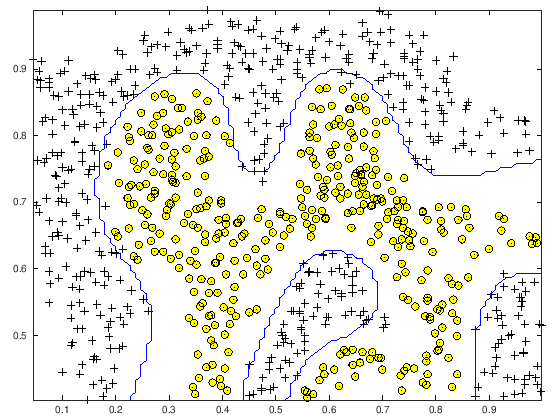

In [17]:
fprintf('\nTraining SVM with RBF Kernel (this may take 1 to 2 minutes) ...\n');
load('ex6data2.mat');                         % Loading Data... you will have X and y in your workspace
C = 1; sigma = 0.1;                           % SVM Parameters

model= svmTrain(X, y, C, @(x1, x2) gaussianKernel(x1, x2, sigma)); % Training your SVM
visualizeBoundary(X, y, model);    

### Example Dataset 3

Now, you will gain more practical skills on how
to use a SVM with a Gaussian kernel. The next part of the exercise will
load and display a third dataset (Figure 6). You will
be using the SVM with the Gaussian kernel with this dataset.

<img src="../../readonly/Assignment6a/figure 6.png" width="450" height="450">

In the provided dataset, **ex6data3.mat**, you are given the
variables $X$, $y$, $Xval$, $yval$. The provided code below
trains the SVM classifier using the training set $X$, $y$ using
parameters loaded from dataset3Params.

You could plot the data to see a similar image. Run the cell below. 

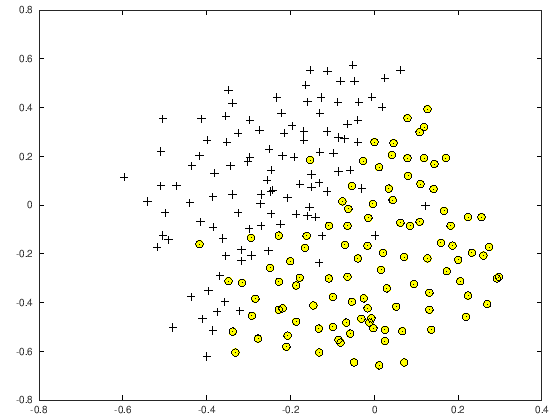

In [18]:
load('ex6data3.mat');         % Loading Data... you will have X and y in your workspace
plotData(X, y);               % Plot training data

Your task now is to use the cross validation set $Xval$, $yval$ to
determine the best $C$ and $\sigma$ parameter to use. You should train your model using svmTrain with the training data and you should test it using the validation data. You should write
any additional code necessary to help you search over the parameters $C$
and $\sigma$. For *both* $C$ and $\sigma$, we suggest trying values in
multiplicative steps (e.g., $0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30$). Note
that you should try all possible pairs of values for $C$ and $\sigma$
(e.g., $C=0.3$ and $\sigma=0.1$). For example, if you try each of the 8
values listed above for $C$ and for $\sigma^2$, you would end up
training and evaluating (on the cross validation set) a total of
$8^2 = 64$ different models.

<img src="../../readonly/Assignment6a/figure 7.png" width="550" height="550">

After you have determined the best $C$ and $\sigma$ parameters to use,
you should modify the code in **dataset3Params** (below), filling in the
best parameters you found. For our best parameters, the SVM returned a decision boundary shown in Figure 7.

**Implementation**:

**[C, sigma] = dataset3Params(X, y, Xval, yval)** returns your choice of C and sigma. You should complete this function to return the optimal C and sigma based on a cross-validation set. Fill in the function below to return the optimal C and sigma learning parameters found using the cross validation set. You can use svmPredict to predict the labels on the cross validation set. For example, predictions = svmPredict(model, Xval); will return the predictions on the cross validation set.  
 
When implementing cross validation to select the best C and parameter to use, you need to evaluate the error on the cross validation set. Recall that for classification, the error is defined as the fraction of the cross validation examples that were classified incorrectly. In Octave/MATLAB, you can compute this error using mean(double(predictions ~= yval)), where predictions is a vector containing all the predictions from the SVM, and yval are the true labels from the cross validation set. You can use the svmPredict function to generate the predictions for the cross validation set. You could also have something like C_list = [0 0.1 0.03...] and s_list = [0.01 0.03...] to try out different values. You could use a nested forloop to evaluate all possible combinations. Comment out the forloop before submitting your code. You should only have C=?; and sigma = ?; Otherwise you will not pass the grader :)


In [45]:
% GRADED FUNCTION: dataset3Params
function [C, sigma] = dataset3Params(X, y, Xval, yval)

C = 3;                           % You need to return the following variables correctly.
sigma = 0.3;

% ====================== YOUR CODE HERE ======================
C_values = [0.01 0.03 0.1 0.3 1 3 10 30];
sigma_values = [0.01 0.03 0.1 0.3 1 3 10 30];

% for i=1:length(C_values)
%     for j=1:length(sigma_values)
%         C = C_values(i);
%         sigma = sigma_values(j);
%         model = svmTrain(X, y, C, @(x1, x2) gaussianKernel(x1, x2, sigma)); 
%         predictions = svmPredict(model, Xval);
%         predictions_error(i,j) = mean(double(predictions ~= yval));
%     end
% end

% mm = min(min(predictions_error));
% [i j] = find(predictions_error == mm);
C = 1 %C_values(i)
sigma = 0.1 % sigma_values(j)
% ============================================================
end

C =  1
sigma =  0.10000

Training ......................................................................
...............................................................................
...............................................................................
..................................................... Done! 



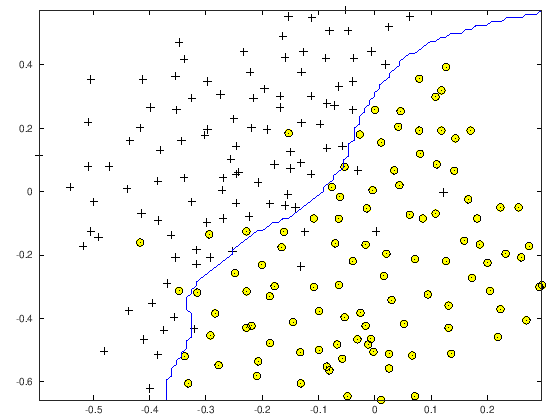

In [46]:
% Try different values of C and sigma here.
load('ex6data3.mat');                                                 % Reloading the data
[C, sigma] = dataset3Params(X, y, Xval, yval);                        % Try different SVM Parameters here
model= svmTrain(X, y, C, @(x1, x2) gaussianKernel(x1, x2, sigma));    % Train the SVM
visualizeBoundary(X, y, model);